<a href="https://colab.research.google.com/github/missaixxka/HomeworkJava/blob/main/montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MonteCarlo.java

In [ ]:
import java.util.ArrayList;
import java.util.List;
import java.util.concurrent.*;

import static java.util.concurrent.Executors.newFixedThreadPool;

class MonteCarlo{
    double a, b;
    double sum_func_values = 0.0;
    final int point_num = (int) Math.pow(10, 6);
    int threads_num;

    MonteCarlo(double a, double b, int threads_num){
        this.a = a;
        this.b = b;
        this.threads_num = threads_num;
    }

    public double integrate() throws InterruptedException, ExecutionException {
        ExecutorService executor = newFixedThreadPool(threads_num);

        List<Callable<Double>> tasks = new ArrayList<>();

        int thread_points_num;
        for (int i = 0; i < threads_num; i++){
            thread_points_num = point_num / threads_num;
            if (i == 0){
                thread_points_num += point_num % threads_num;
            }

            Callable<Double> task = new MonteCarloTask(a, b, thread_points_num);
            tasks.add(task);
        }

        List<Future<Double>> futures = executor.invokeAll(tasks);

        for (Future<Double> future : futures){
            sum_func_values += future.get();
        }

        executor.shutdown();

        return (b - a) * (sum_func_values / point_num);
    }

    private class MonteCarloTask implements Callable<Double>{
        double a, b;
        int thread_points_num;
        double sum = 0.0;

        MonteCarloTask(double a, double b, int thread_points_num){
            this.a = a;
            this.b = b;
            this.thread_points_num = thread_points_num;
        }

        @Override
        public Double call() throws Exception{
            ThreadLocalRandom random = ThreadLocalRandom.current();
            for (int i = 0; i < thread_points_num; i++){
                double x = a + random.nextDouble() * (b - a);
                double fx = function(x);
                sum += fx;
            }
            return sum;
        }
    }

    private double function(double x){
        if (x <= 1e-10) {
            x = 1e-10;
        }
        double term1 = Math.pow(x, 5) / (x * x + 1);
        double term2 = Math.log(Math.sqrt(x));
        return term1 + term2;
    }
}

# Main.java

In [ ]:
import java.util.concurrent.ExecutionException;

public class Main {
    public static void main(String[] args) {
        double a = 0;
        double b = 100;
        int threads_num = 4;
        MonteCarlo integrator = new MonteCarlo(a, b, threads_num);
        try {
            double result = integrator.integrate();
            System.out.println("Result: " + result);
        } catch (ExecutionException | InterruptedException e) {
            e.printStackTrace();
        }
    }
}


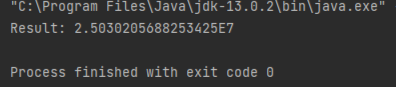